<a href="https://colab.research.google.com/github/AdrianAasen/AQT/blob/main/AQT_Mixed_state_entanglement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mixed state entangelment 
## Sheet 4, problem 3
AQT 2022

In [3]:
# load standard libraries
import numpy as np   # standard numerics library
import matplotlib.pyplot as plt   # for making plots
from numpy import linalg as LA #Linear algebra library


%matplotlib inline

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars


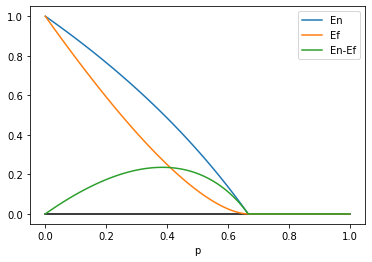

In [21]:
n=100
p=np.linspace(0,1,n)

def rhoW(p):
  return 1/4*np.array([[2-p,0,0,2*(1-p)],[0,p,0,0],[0,0,p,0],[2*(1-p),0,0,2-p]])

def WernerPTB(p): # Takes the partial trace of rho
  return 1/4*np.array([[2-p,0,0,0],[0,p,2*(1-p),0],[0,2*(1-p),p,0],[0,0,0,2-p]])
  

def EN(p):
  En=np.zeros(len(p))
  for i in range(len(p)):
    eig,v=LA.eig(WernerPTB(p[i]))
    N=1/2*np.sum(np.abs(eig)-eig)
    En[i]=np.log2(1+2*N)
  return En


def EF(p):
  Ef=np.zeros(len(p))
  for i in range(len(p)):
    eig,v=LA.eig(rhoW(p[i]))
    concurrence=np.maximum(0,eig[0]-eig[1]-eig[2]-eig[3])
    x=(1+np.sqrt(1-concurrence**2))/2
    Ef[i]=np.nan_to_num(-x*np.log2(x) - (1-x)*np.log2(1-x)) # Nan_to_num makes sure the 0*log(0) is handeled correctly
  return Ef

En=EN(p)
Ef=EF(p)

plt.plot(p,p*0,c='k')
plt.plot(p,En,label='En')
plt.plot(p,Ef,label='Ef')
plt.plot(p,En-Ef,label='En-Ef')

plt.xlabel("p")
plt.legend()
plt.show()


